Importing the dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing the Boston House Proce dataset from the sklearn dataset.

In [2]:
dataset = pd.read_csv('/content/BostonHousing.csv')

In [3]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.shape

(506, 14)

In [5]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


Understanding the Corelation between different Features of the dataset file.

In [7]:
dataset.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219433,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311173,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394193,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091468,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302751,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240286,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.203507,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210718,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292794,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

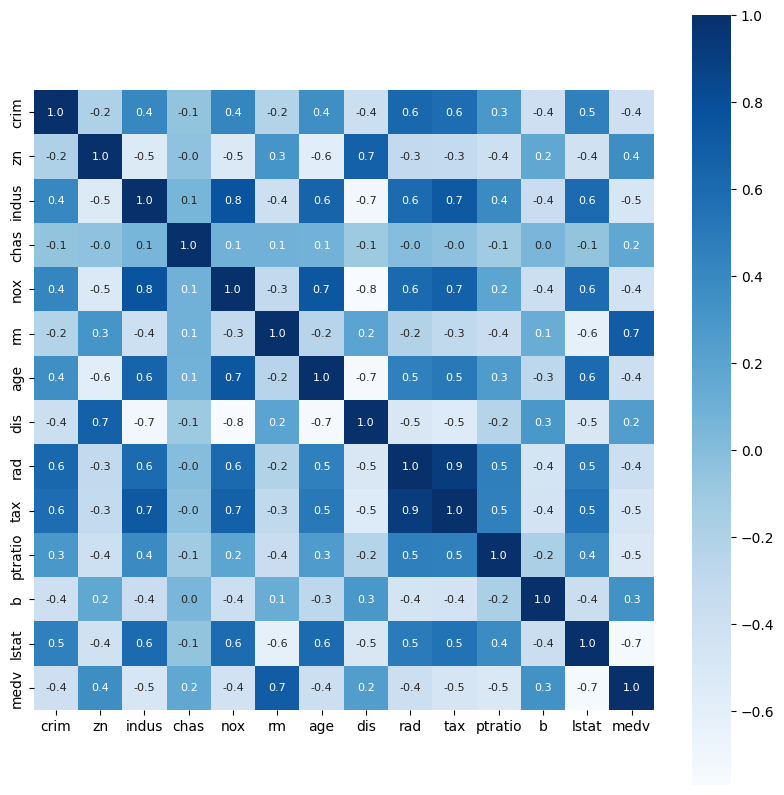

In [8]:
# creating the heatmap for the above data.
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr(), cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

Spliting the Data into two different parts, 1st part includes the columns except medv and the 2nd part contains the column medv.

In [9]:
X = dataset.drop(['medv'], axis = 1)
Y = dataset['medv']

In [10]:
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Spliting the data into the training and the testing data.


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [13]:
print(Y.shape, Y_train.shape, Y_test.shape)

(506,) (404,) (102,)


Importing the Model : XGBRegressor

In [14]:
model = XGBRegressor()

Training the Model with the training datasets X_train and Y_train.

In [15]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the training data.

In [16]:
train_data_prediction = model.predict(X_train)

In [17]:
print(train_data_prediction)

[23.098213  20.999493  20.100712  34.69146   13.908512  13.499188
 22.005543  15.206342  10.8988695 22.677683  13.802292   5.5992246
 29.79903   50.000896  34.881298  20.619646  23.372395  19.202538
 32.697285  19.604185  26.987984   8.400937  45.993626  21.712433
 27.08105   19.349197  19.29314   24.7933    22.61487   31.693779
 18.539114   8.702092  17.40409   23.699408  13.297645  10.494993
 12.669688  25.000593  19.698307  14.9110775 24.21232   25.000761
 14.900763  17.013046  15.597457  12.68823   24.503881  14.999328
 49.99955   17.532228  21.199259  32.010696  15.601823  22.893911
 19.322012  18.73874   23.292349  37.210262  30.105167  33.121197
 20.999691  49.985893  13.400765   5.009729  16.502712   8.40547
 28.691751  19.494135  20.596006  45.400337  39.80286   33.40684
 19.829916  33.40482   25.281872  49.998436  12.519731  17.429428
 18.605316  22.591347  50.00362   23.805405  23.30907   23.092073
 41.70726   16.111097  31.623669  36.082043   6.9961967 20.400877
 19.989061 

Checking for the quantity of error our model makes in predicting the Training data.

In [18]:
# checking for R Squared Error.
error_score_1 = metrics.r2_score(Y_train, train_data_prediction)

# checking for the Mean Absolute Error.
error_score_2 = metrics.mean_absolute_error(Y_train, train_data_prediction)

In [19]:
print(f"R Squared Error : {error_score_1}")
print(f"Mean Absolute Error : {error_score_2}")

R Squared Error : 0.9999974930039426
Mean Absolute Error : 0.0099853890957219


As we can see that the error our model makes is extremly small. This means that our model is 'HIGHLY ACCURATE' on the training data.

Evaluating the Test data.

In [20]:
test_data_prediction = model.predict(X_test)

In [21]:
print(test_data_prediction)

[23.051582  22.26548   30.534235  30.298868   8.283541  13.436366
 24.575932  27.766064  19.182896  17.776907  26.796337  23.131065
 20.013227  21.383413  13.640971  22.113802  21.40974   11.393402
  8.339752  16.61833   22.370926  20.283094  36.801643  19.567535
 13.8622055 18.482763  47.20366   30.693798  34.992237  18.970066
 16.478281  20.275381  30.901081  24.435282  12.624655  19.072628
 10.865764  20.886345  22.904762  21.985025  26.506695  13.329459
 27.695917   7.940863  20.765049  13.987141  34.935993  14.539947
 31.870438  16.105537  29.867462  26.532923   6.668651  33.866
 24.236544  18.535002  19.203188  19.781084  16.424307  23.35871
 20.073387  21.032986  18.888412  28.552784  32.391296  25.537346
 49.109154  26.794142   9.679564  23.440357  15.96349    8.445381
 15.487857  16.580793  26.893454  24.326546  20.8615    22.012526
 18.717272  24.266758  34.40664   18.5962    20.085379  31.239168
 47.928627  36.38205   16.971954  24.86152   30.626663  18.267553
 20.64684   19

Checking for the quantity of error our model makes in predicting the Test data.

In [22]:
# Checking for R Squared Error.
error_score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Checking for Mean Absolute Error.
error_score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [23]:
print(f"R Squared Error : {error_score_3}")
print(f"Mean Absolute Error : {error_score_4}")

R Squared Error : 0.9156404620793328
Mean Absolute Error : 1.9900942007700595


As we can see that the error our model makes is extremly small. This means that our model is 'ALMOST ACCURATE' on the testing data also.

Visualizing the Actual Price and the Predicted Price on the Training data.

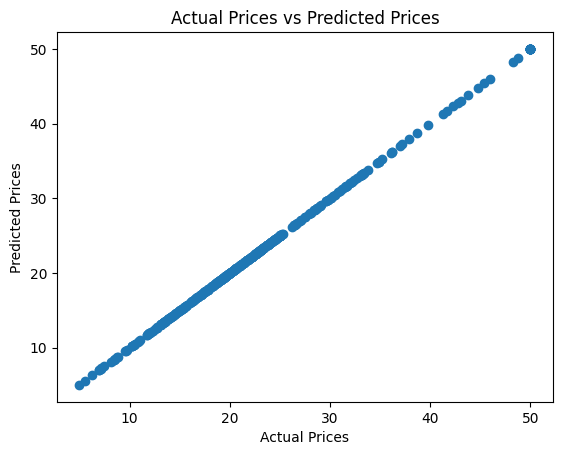

In [24]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

The above straight line shows that our model is 'HIGHLY ACCURATE' on the train data.

Visualizing the Acctual Price and the Predicted Price on the Test Data.

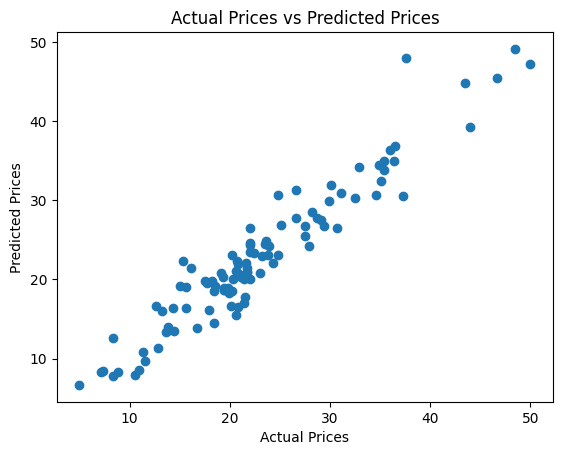

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

As we can see that the graph is almost the Straight line which shows the Accuracy of this model on the Test Data.

Making the Predictive Data.

In [26]:
input_data = (0.14866,0,8.56,0,0.52,6.727,79.9,2.7778,5,384,20.9,394.76,9.42) # Upload your data here.
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(f"The Price of the House According to the given data is : {prediction} in 1000USD.")

The Price of the House According to the given data is : [25.537346] in 1000USD.
